<a href="https://colab.research.google.com/github/finaorivia19/PCVK_Ganjil_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 7 Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection
*   Nama : Fina Orivia Nurfadillah
*   Absen : 08
*   NIM  : 2141720256






1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import cv2
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

# Praktikum Filter

1. Operasi Sharpen

Operasi Sharpen
---------------------------------


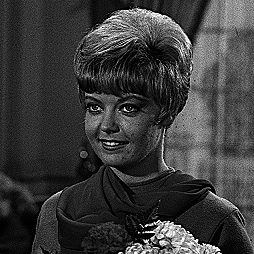

In [ ]:
def convolution2d(image, kernel, stride, padding): #melakukan konvolusi 2D pada citra/grayscale, Parameter stride digunakan untuk menentukan seberapa besar "langkah" ketika meletakkan kernel di atas gambar, dan padding digunakan untuk mengatur jenis padding (zero padding) yang digunakan selama operasi konvolusi.
#Padding adalah cara menambahkan piksel di sekitar gambar
    image_height, image_width = image.shape #mengambil dimensi dari gambar yang akan diolah.
#fungsi shape, mendapatkan tuple yang berisi dimensi gambar, dan elemen pertama tuple adalah tinggi gambar,sedangkan elemen kedua adalah lebar gambar
    kernel_height, kernel_width = kernel.shape #mengambil dimensi dari kernel yang akan digunakan untuk konvolusi.
    result_height = image_height - kernel_height + 1 ##menghitung tinggi dari hasil matriks konvolusi. Ini dilakukan dengan mengurangkan tinggi kernel dari tinggi gambar dan menambahkan 1
    result_width = image_width - kernel_width + 1 #menghitung lebar dari hasil matriks konvolusi.

    result = np.zeros((result_height, result_width), dtype=np.float32)
#membuat matriks nol dengan ukuran yang telah dihitung sebelumnya

    for x in range(result_width): #mengatur posisi kernel di atas gambar. x dan y adalah koordinat titik tengah kernel pada gambar.
        for y in range(result_height):
            z = 0
            for k1 in range(kernel_width):#mengalikan setiap elemen kernel dengan piksel yang sesuai pada gambar, dan kemudian menjumlahkan hasilnya untuk menghitung nilai konvolusi pada titik tertentu dalam hasil gambar.
                for k2 in range(kernel_height):
                    z += kernel[k2, k1] * image[y + k2, x + k1]
            result[y, x] = z #menyimpan hasil konvolusi pada koordinat (x, y)

    return result

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/image/female.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendefinisikan kernel untuk sharpen
#Kernel adalah matriks kecil yang digunakan dalam operasi konvolusi untuk mengubah atau memproses citra.
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
#nilai 5 yaitu bobot tertinggi,memberikan kontribusi paling besar pada piksel tengah yang sedang dihitung dalam operasi konvolusi, piksel lebih terang.
#nilai -1 bobot negatif, yang memberikan kontribusi negatif pada piksel tetangga.piksel lebih gelap
#Nilai 0 adalah bobot nol dan tidak memberikan kontribusi pada piksel tengah atau tetangga.

# Menjalankan konvolusi
sharpened_image = convolution2d(img_gray, kernel_sharpen,1,2)
#nilai 1 mengindikasikan bahwa kernel akan bergeser satu piksel setiap kali.
#Nilai 2(parameter padding) mengindikasikan bahwa zero-padding akan digunakan. Zero-padding menambahkan piksel-piksel nol di sekeliling gambar sehingga hasil konvolusi memiliki ukuran yang sama dengan gambar asli.

# Menampilkan hasil konvolusi
print('Operasi Sharpen')
print('---------------------------------')
cv2_imshow(sharpened_image)

2. Operasi Emboss

Operasi Emboss
---------------------------------


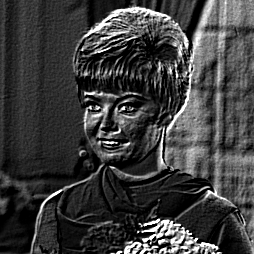

In [ ]:
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result_height = image_height - kernel_height + 1
    result_width = image_width - kernel_width + 1

    result = np.zeros((result_height, result_width), dtype=np.float32)

    for x in range(result_width):
        for y in range(result_height):
            z = 0
            for k1 in range(kernel_width):
                for k2 in range(kernel_height):
                    z += kernel[k2, k1] * image[y + k2, x + k1]
            result[y, x] = z

    return result

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/image/female.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendefinisikan kernel untuk Emboss
kernel_emboss = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])
#Nilai -2 adalah bobot tertinggi dan akan memberikan kontribusi paling besar pada piksel tengah yang sedang dihitung dalam operasi konvolusi.piksel lebih gelap.
#Nilai 2 adalah bobot tertinggi positif, yang akan memberikan kontribusi terbesar pada piksel tetangga yang lebih gelap.

# Menjalankan konvolusi
embossed_image = convolution2d(img_gray, kernel_emboss,1,2)
#digunakan untuk menciptakan efek tiga dimensi pada gambar dengan menyoroti perbedaan intensitas antara piksel-piksel dalam gambar.

# Menampilkan hasil konvolusi
print('Operasi Emboss')
print('---------------------------------')
cv2_imshow(embossed_image)

Operasi Left Sobel Edge Detection

Left Sobel Edge Detection
---------------------------------


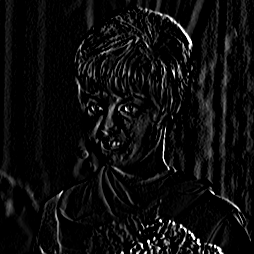

In [ ]:
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result_height = image_height - kernel_height + 1
    result_width = image_width - kernel_width + 1
    result = np.zeros((result_height, result_width), dtype=np.float32)

    for x in range(result_width):
        for y in range(result_height):
            z = 0
            for k1 in range(kernel_width):
                for k2 in range(kernel_height):
                    z += kernel[k2, k1] * image[y + k2, x + k1]
            result[y, x] = z

    return result

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/image/female.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendefinisikan kernel untuk Left Sobel Edge Detection
kernel_left_sobel = np.array([[1, 0, -1],
                              [2, 0, -2],
                              [1, 0, -1]])

# Menjalankan konvolusi
edge_detected_image = convolution2d(img_gray, kernel_left_sobel,1,2)

# Menampilkan hasil konvolusi
print('Left Sobel Edge Detection')
print('---------------------------------')
cv2_imshow(edge_detected_image)

4. Operasi Canny Edge Detection

Canny Edge Detection
---------------------------------


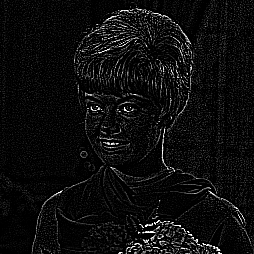

In [ ]:
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result_height = image_height - kernel_height + 1
    result_width = image_width - kernel_width + 1
    result = np.zeros((result_height, result_width), dtype=np.float32)

    for x in range(result_width):
        for y in range(result_height):
            z = 0
            for k1 in range(kernel_width):
                for k2 in range(kernel_height):
                    z += kernel[k2, k1] * image[y + k2, x + k1]
            result[y, x] = z

    return result

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/image/female.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendefinisikan kernel untuk Canny Edge Detection
kernel_canny = np.array([[-1, -1, -1],
                         [-1, 8, -1],
                         [-1, -1, -1]])

# Menjalankan konvolusi
edge_detected_image = convolution2d(img_gray, kernel_canny, 1, 2)

# Menampilkan hasil konvolusi
print('Canny Edge Detection')
print('---------------------------------')
cv2_imshow(edge_detected_image)

5. Operasi Prewitt Edge Detection

Prewitt Edge Detection
---------------------------------


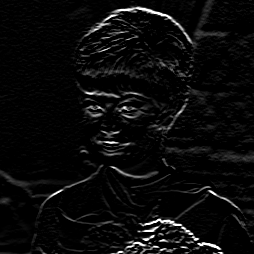

In [ ]:
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result_height = image_height - kernel_height + 1
    result_width = image_width - kernel_width + 1
    result = np.zeros((result_height, result_width), dtype=np.float32)

    for x in range(result_width):
        for y in range(result_height):
            z = 0
            for k1 in range(kernel_width):
                for k2 in range(kernel_height):
                    z += kernel[k2, k1] * image[y + k2, x + k1]
            result[y, x] = z

    return result

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/image/female.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendefinisikan kernel untuk Prewitt Edge Detection
kernel_prewitt = np.array([[-1, -1, -1],
                          [0, 0, 0],
                          [1, 1, 1]])

# Menjalankan konvolusi
edge_detected_image = convolution2d(img_gray, kernel_prewitt, 1, 2)

# Menampilkan hasil konvolusi
print('Prewitt Edge Detection')
print('---------------------------------')
cv2_imshow(edge_detected_image)

6. Operasi 5x5 Gaussian Blur


5x5 Gaussian Blur
---------------------------------


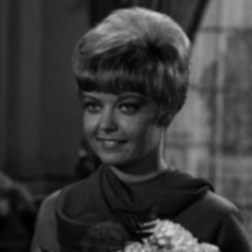

In [ ]:
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result_height = image_height - kernel_height + 1
    result_width = image_width - kernel_width + 1
    result = np.zeros((result_height, result_width), dtype=np.float32)

    for x in range(result_width):
        for y in range(result_height):
            z = 0
            for k1 in range(kernel_width):
                for k2 in range(kernel_height):
                    z += kernel[k2, k1] * image[y + k2, x + k1]
            result[y, x] = z

    return result

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/image/female.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendefinisikan kernel untuk 5x5 Gaussian Blur
kernel_gaussian_blur = (1/256) * np.array([[1, 4, 6, 4, 1],
                                           [4, 16, 24, 16, 4],
                                           [6, 24, 36, 24, 6],
                                           [4, 16, 24, 16, 4],
                                           [1, 4, 6, 4, 1]])

# Menjalankan konvolusi
blurred_image = convolution2d(img_gray, kernel_gaussian_blur, 1, 2)

# Menampilkan hasil konvolusi
print('5x5 Gaussian Blur')
print('---------------------------------')
cv2_imshow(blurred_image)



7. Operasi 21x21 Gaussian Blur

21x21 Gaussian Blur
---------------------------------


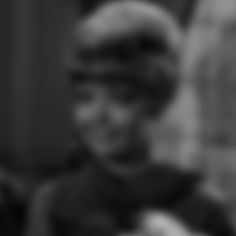

In [ ]:
def convolution2d(image, kernel, stride, padding):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result_height = image_height - kernel_height + 1
    result_width = image_width - kernel_width + 1
    result = np.zeros((result_height, result_width), dtype=np.float32)

    for x in range(result_width):
        for y in range(result_height):
            z = 0
            for k1 in range(kernel_width):
                for k2 in range(kernel_height):
                    z += kernel[k2, k1] * image[y + k2, x + k1]
            result[y, x] = z

    return result

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/image/female.tiff')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mendefinisikan ukuran kernel dan sigma
kernel_size = 21
sigma = math.sqrt(kernel_size)

# Membuat kernel Gaussian dengan OpenCV
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

# Menjalankan konvolusi
blurred_image = convolution2d(img_gray, gauss_kernel, 1, 2)

# Menampilkan hasil konvolusi
print('21x21 Gaussian Blur')
print('---------------------------------')
cv2_imshow(blurred_image)

# TUGAS

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui
implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

KTP.png
---------------------------------


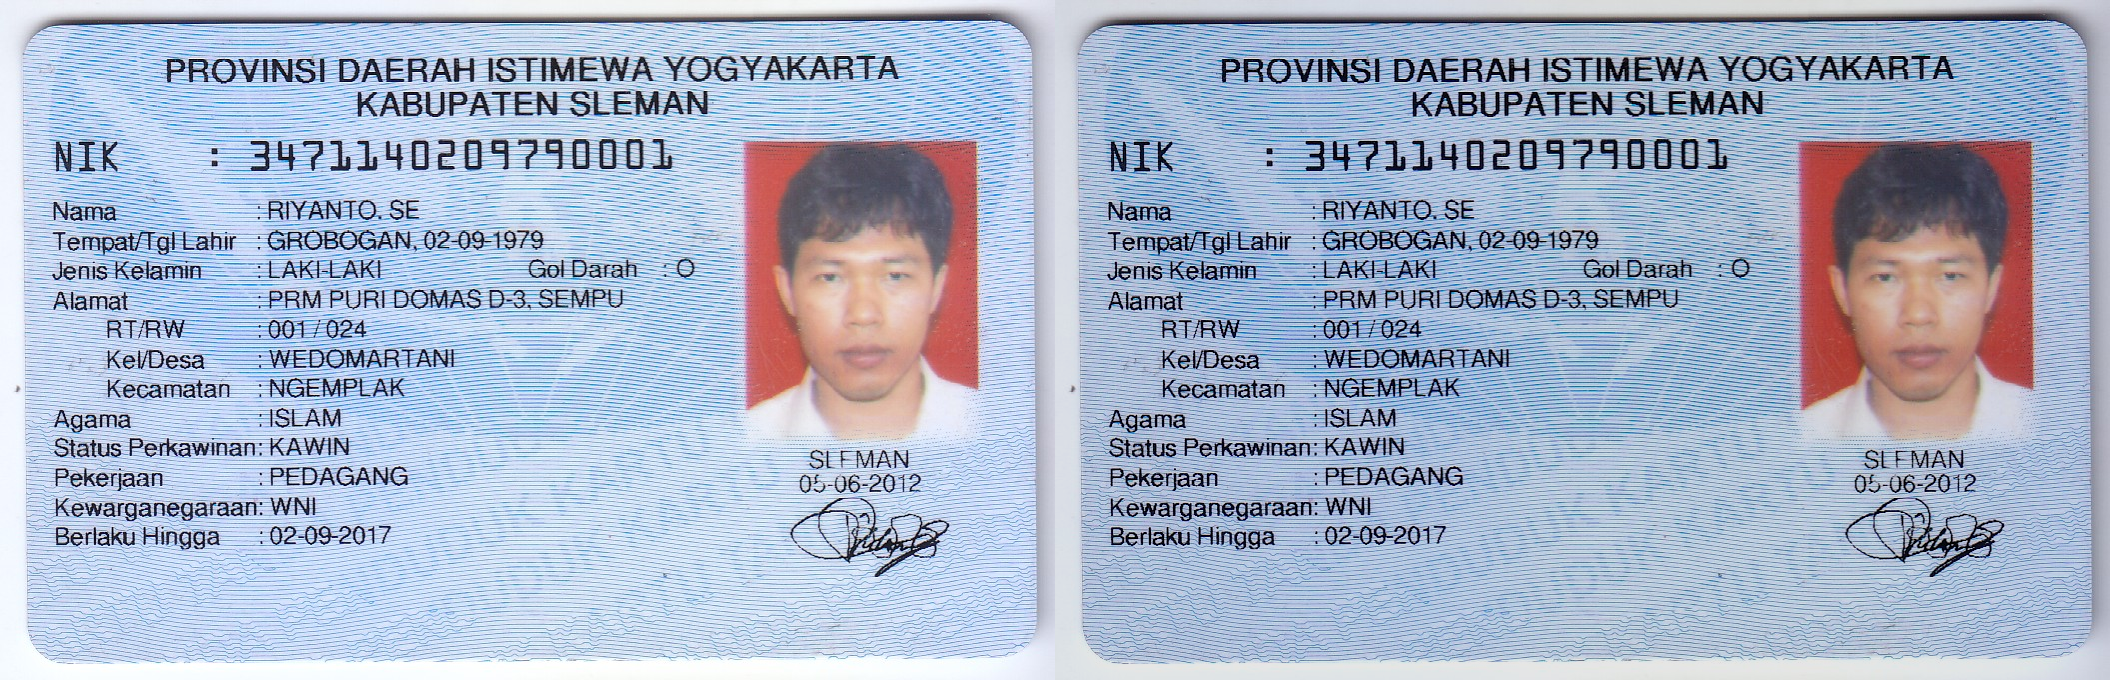

In [ ]:
def Brightness (image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)

  return brightness_image

def hist_equ (image):
  channels = cv.split(image)
  eq_channels = []
  for ch, color in zip(channels, ["r", "g", "b"]):
    eq_channels.append(cv.equalizeHist(ch))

  eq_image = cv.merge(eq_channels)

  return eq_image

def conv2d(image, kernel, stride):

  height, width = image.shape[0], image.shape[1]
  kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]

  start = int(kernel_width/2)

  image_result = np.copy(image)

  for y in range(start, height - start, stride):
    for x in range(start, width - start, stride):
      value = 0

      for ky in range(kernel_height):
        for kx in range(kernel_width):
          i = y - start + ky
          j = x - start + kx

          value += image[i, j] * kernel[ky, kx]

      image_result[y, x] = np.clip(value, 0, 255)

    return image_result

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype = np.float32)

## KTP.png
ktp = cv.imread('/content/drive/MyDrive/image/ktp.png')

kernel_size = 5
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel@ gaussian_kernel.transpose()

result_brightness = Brightness(ktp, -25)

result = conv2d(result_brightness, gauss_kernel,1)

final_frame = cv.hconcat((ktp, result))
print('KTP.png')
print('---------------------------------')
cv2_imshow(final_frame)


KTP1.png
---------------------------------


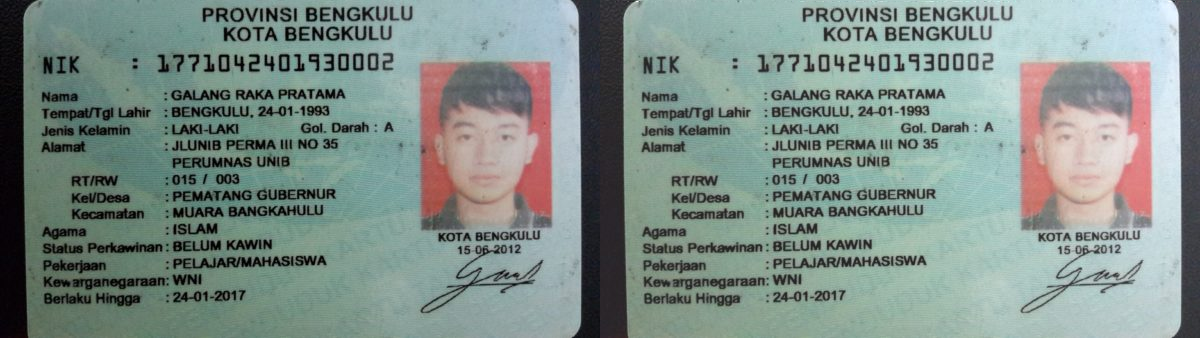

In [ ]:
## KTP1.png
ktp1 = cv.imread('/content/drive/MyDrive/image/ktp1.png')
result = conv2d(ktp1, kernel_sharpen,1)
brightness = Brightness(result, 35)
final_frame = cv.hconcat((ktp1, brightness))
print('KTP1.png')
print('---------------------------------')
cv2_imshow(final_frame)

KTP2.png
---------------------------------


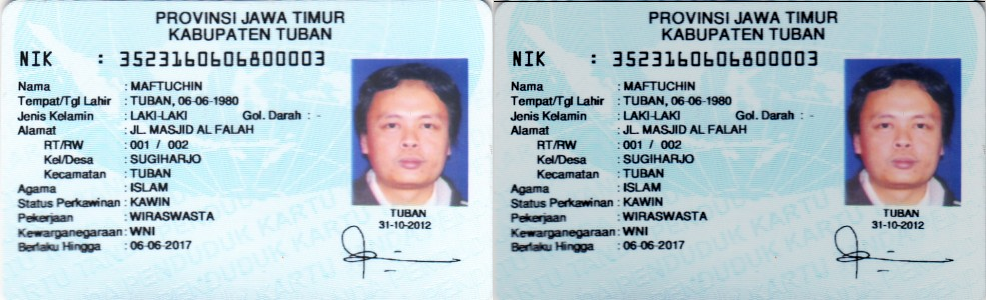

In [ ]:
## KTP2.png
ktp2 = cv.imread('/content/drive/MyDrive/image/ktp3.png')

kernel_lsed = np.array([[1, 0, -1],
                          [2, 0, -3],
                          [1, 0, -2]], dtype=np.float32)

result = conv2d(ktp2, kernel_lsed,1)
brightness = Brightness(result, -35)
final_frame = cv.hconcat((ktp2, brightness))
print('KTP2.png')
print('---------------------------------')
cv2_imshow(final_frame)
